In [3]:
# Normal Imports
import numpy as np
from numpy.random import randn
import pandas as pd
# Stats
from scipy import stats
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Show plots in notebook
%matplotlib inline

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


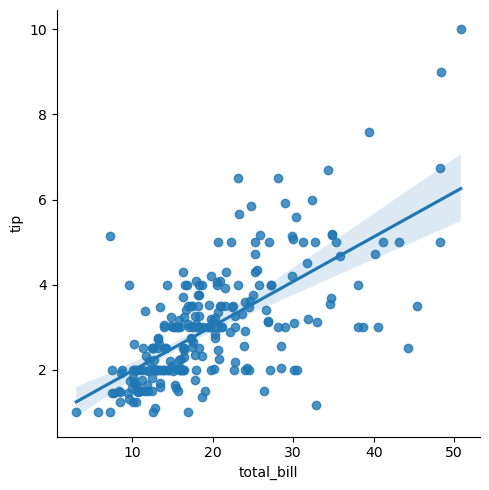

In [8]:
# Tips vs total bill
sns.lmplot(x='total_bill',y='tip',data=tips)
# Estimated linear fit to the model

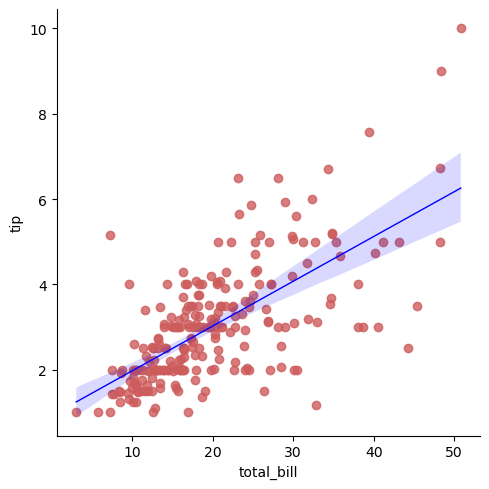

In [12]:
# Using a dictionary to adjust specific plot arguments
sns.lmplot(x='total_bill',y='tip',data=tips,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

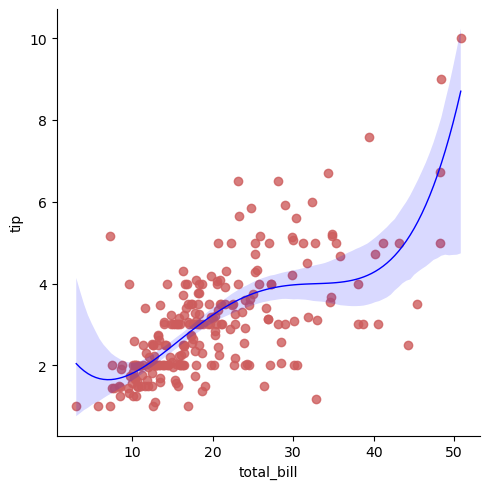

In [14]:
# Can also do quadratic orders on this dataset
sns.lmplot(x='total_bill',y='tip',data=tips, order=4,
          scatter_kws={'marker':'o','color':'indianred'},
          line_kws={'linewidth':1,'color':'blue'})

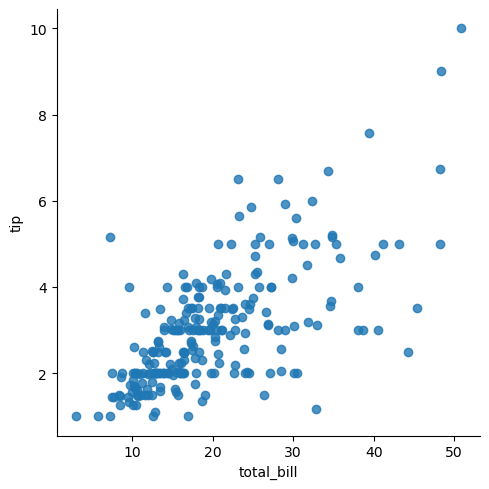

In [16]:
sns.lmplot(x='total_bill',y='tip',data=tips,fit_reg=False)

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [18]:
tips['tips_pct']=100*(tips['tip']/tips['total_bill'])

In [19]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


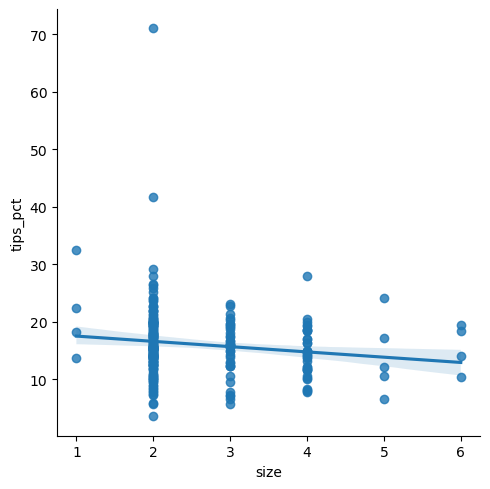

In [20]:
sns.lmplot(x='size',y='tips_pct',data=tips)

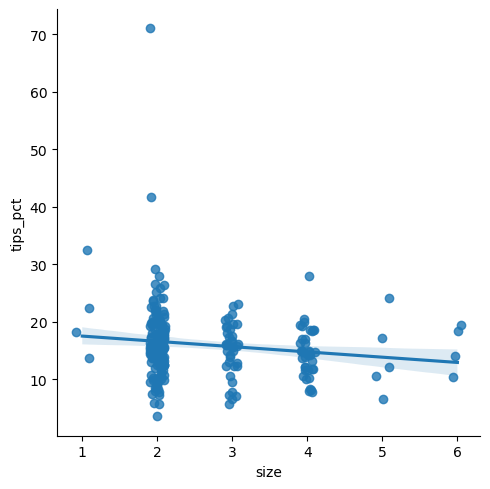

In [21]:
# Add a jitter to make it easier to read (spreads out the x values)
url = "http://en.wikipedia.org/wiki/Jitter"
sns.lmplot(x='size',y='tips_pct',data=tips,x_jitter=0.1)

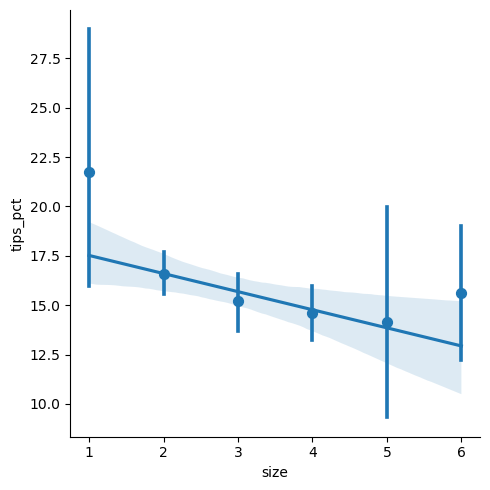

In [23]:
# Estimate the tendency of each bin, each bin being the size of the party
sns.lmplot(x='size',y='tips_pct',data=tips,x_estimator=np.mean)

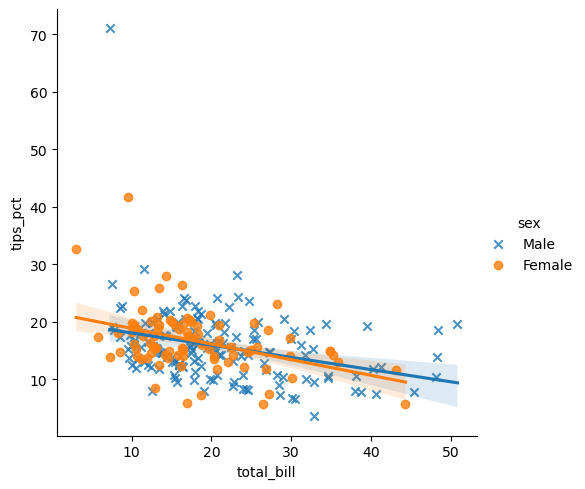

In [27]:
# Hue facet to automatically define subsets in a column
sns.lmplot(x='total_bill', y='tips_pct', data=tips, hue='sex', markers=['x','o'])

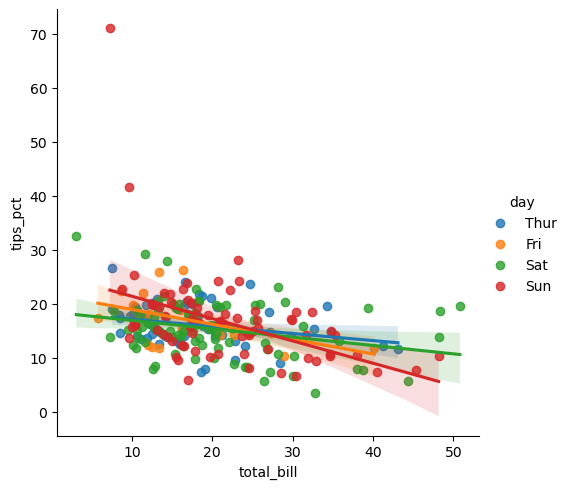

In [28]:
# Does the day make much of a difference in how much people tip?
sns.lmplot(x='total_bill',y='tips_pct',data=tips,hue='day')
# Can get a lot of info from these multi-linear regression plots!

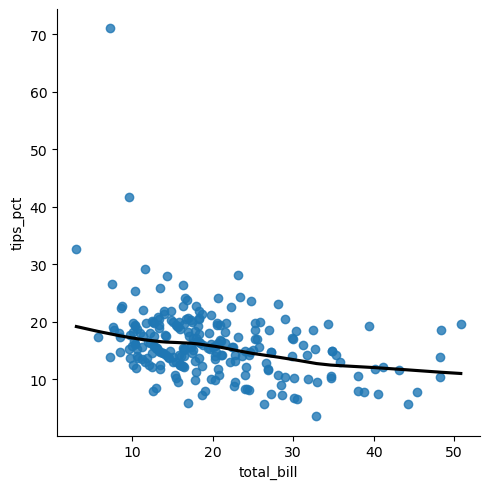

In [30]:
# Seaborn also supports Loess (locally estimated scatterplot smoothing) regressions or local regression
url = 'http://en.wikipedia.org/wiki/Local_regression'
sns.lmplot(x='total_bill',y='tips_pct',data=tips,lowess=True,line_kws={'color':'black'})

<AxesSubplot:xlabel='total_bill', ylabel='tips_pct'>

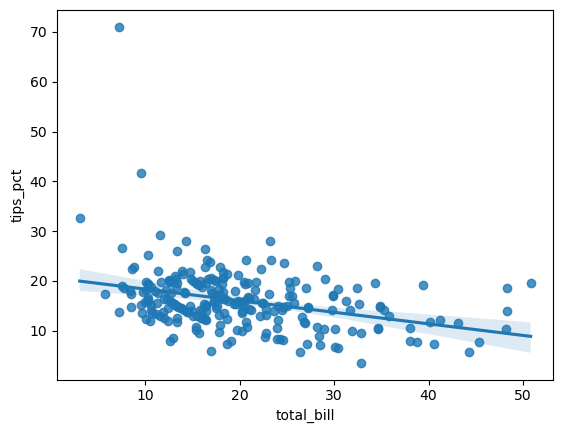

In [31]:
# lmplot is actually using a lower level function called 'regplot'
# Can be added to an existing axis with other sub plots without any altering
sns.regplot(x='total_bill',y='tips_pct',data=tips)

<AxesSubplot:xlabel='size', ylabel='tips_pct'>

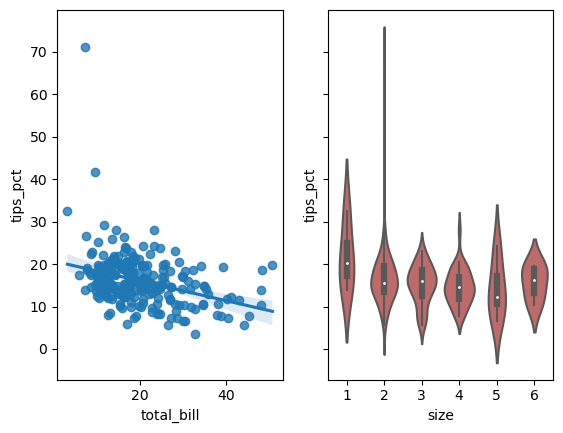

In [43]:
fig, (axis1, axis2) = plt.subplots(1,2,sharey=True)
sns.regplot(x='total_bill',y='tips_pct',data=tips,ax=axis1)
sns.violinplot(y=tips['tips_pct'],x=tips['size'],color='indianred',ax=axis2)